DATA CREATION

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)
n = 500

df = pd.DataFrame({
    'Age': np.random.randint(18, 65, size=n),
    'Annual_Income': np.random.normal(60000, 15000, size=n).astype(int),
    'Spending_Score': np.random.randint(1, 101, size=n),
    'Visits_per_Month': np.random.poisson(4, size=n),
    'Clicks_per_Visit': np.random.normal(2.5, 0.5, size=n)
})

df.to_csv("customer_tsne.csv", index=False)


## Tasks:
1. Normalize all features before applying t-SNE.

2. Apply t-SNE (n_components=2) to reduce features to 2D.

3. Plot the 2D projection — use color to optionally show clusters (e.g., k-means on raw or reduced data).

4. Interpret the plot:

    - Do you see natural groupings?

    - What might they represent behaviorally?

In [2]:
df.head()

,Age,Annual_Income,Spending_Score,Visits_per_Month,Clicks_per_Visit
0,56,91995,21,2,2.412109
1,46,30718,81,5,2.704136
2,32,57723,87,6,2.882349
3,60,68824,80,1,1.879383
4,25,64214,70,4,1.732105


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               500 non-null    int32  
 1   Annual_Income     500 non-null    int64  
 2   Spending_Score    500 non-null    int32  
 3   Visits_per_Month  500 non-null    int32  
 4   Clicks_per_Visit  500 non-null    float64
dtypes: float64(1), int32(3), int64(1)
memory usage: 13.8 KB


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

X = df[['Age', 'Annual_Income', 'Spending_Score', 'Visits_per_Month', 'Clicks_per_Visit']]
X_scaled = StandardScaler().fit_transform(X)

tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X_scaled)

df['TSNE_1'] = X_embedded[:, 0]
df['TSNE_2'] = X_embedded[:, 1]


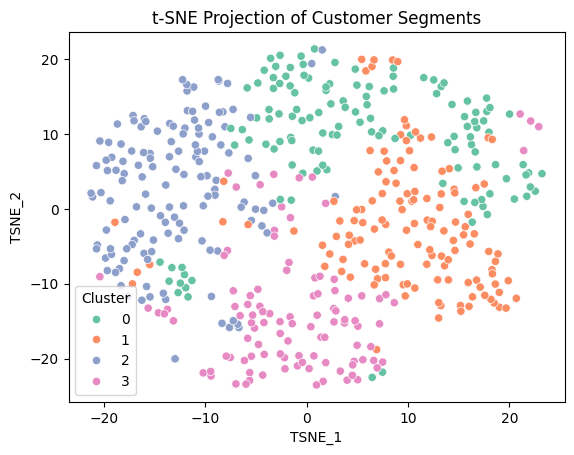

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

sns.scatterplot(data=df, x='TSNE_1', y='TSNE_2', hue='Cluster', palette='Set2')
plt.title("t-SNE Projection of Customer Segments")
plt.show()


In [13]:
df.groupby('Cluster').mean()

,Age,Annual_Income,Spending_Score,Visits_per_Month,Clicks_per_Visit,TSNE_1,TSNE_2
Cluster,,,,,,,
0,50.100775,50027.759690,55.015504,3.209302,2.196072,5.379104,9.081029
1,40.564885,64524.129771,79.480916,3.648855,2.833016,9.713959,-2.284647
2,44.533333,69322.570370,21.614815,3.955556,2.524368,-12.948075,2.498662
3,27.142857,54045.533333,49.419048,5.733333,2.244661,-0.912189,-13.372720


In [19]:
df.groupby('Cluster').size().sort_values(ascending=False)

Cluster
2    135
1    131
0    129
3    105
dtype: int64

<Axes: >

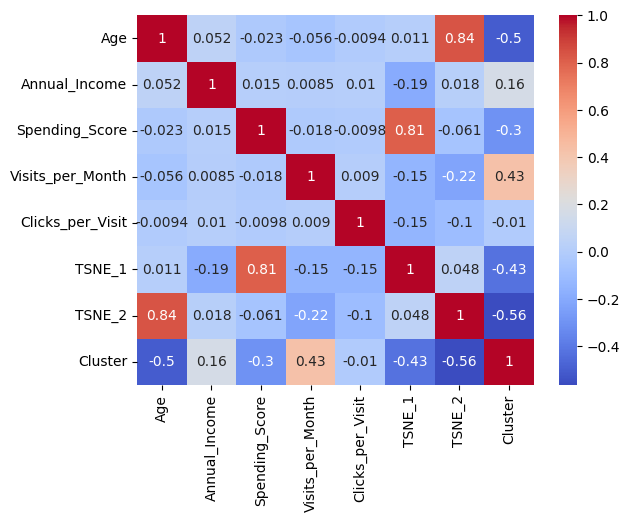

In [20]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

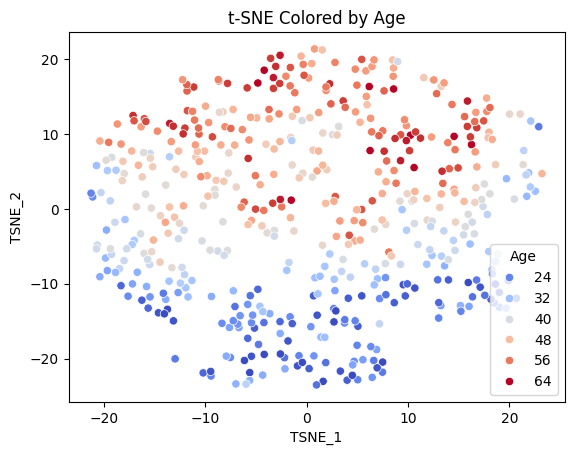

In [24]:
sns.scatterplot(x='TSNE_1', y='TSNE_2', hue=df['Age'], palette='coolwarm', data=df)
plt.title("t-SNE Colored by Age")
plt.show()

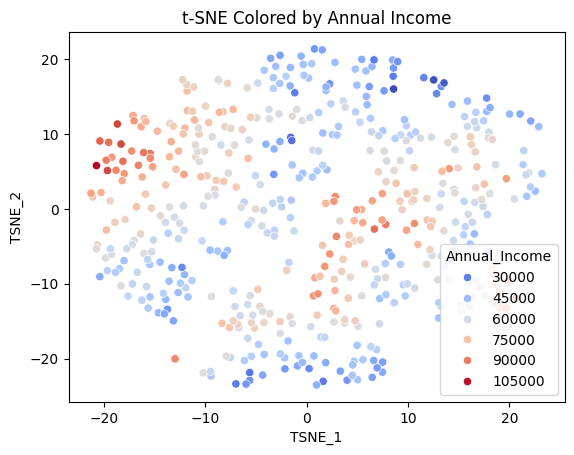

In [26]:
sns.scatterplot(x='TSNE_1', y='TSNE_2', hue=df['Annual_Income'], palette='coolwarm', data=df)
plt.title("t-SNE Colored by Annual Income")
plt.show()

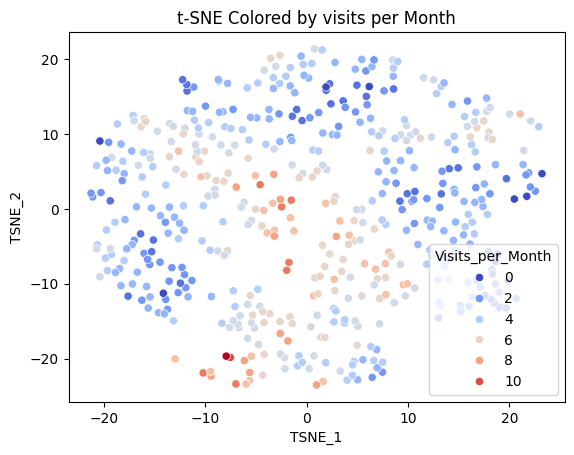

In [28]:
sns.scatterplot(x='TSNE_1', y='TSNE_2', hue=df['Visits_per_Month'], palette='coolwarm', data=df)
plt.title("t-SNE Colored by visits per Month")
plt.show()

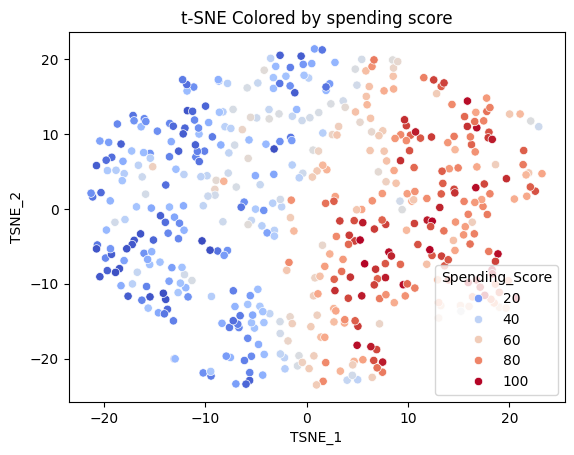

In [29]:
sns.scatterplot(x='TSNE_1', y='TSNE_2', hue=df['Spending_Score'], palette='coolwarm', data=df)
plt.title("t-SNE Colored by spending score")
plt.show()